In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

Tasks
1.Find the linear regression equation for this data.
2.Chart the original data and the equation on the chart.
3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps_Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [3]:
## find the any outliers in data 

IQR=df.Chirps_Second.quantile(0.75)-df.Chirps_Second.quantile(0.25)

upper_fence=df.Chirps_Second.quantile(0.75) + (1.5 * IQR) ## Q3
lower_fence=df.Chirps_Second.quantile(0.25)-(1.5 * IQR)  ## Q1

print(upper_fence , lower_fence)


19.699999999999996 12.9


there is no outliers/ skew in data "df"

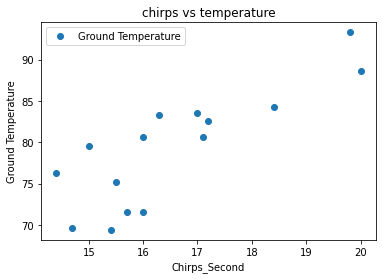

In [4]:
df.plot(x='Chirps_Second', y='Ground Temperature', style='o')
plt.title('chirps vs temperature')
plt.xlabel('Chirps_Second')
plt.ylabel('Ground Temperature')
plt.show()

In [5]:
df.corr()

,Chirps_Second,Ground Temperature
Chirps_Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [6]:
## split the data for train and test 

x=df.loc[ :,['Chirps_Second']].values
y=df.loc[ :,['Ground Temperature']].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [7]:
x_train  

array([[16.3],
       [17.1],
       [14.4],
       [16. ],
       [15.7],
       [18.4],
       [15. ],
       [15.5],
       [15.4],
       [14.7]])

In [8]:
y_train

array([[83.3],
       [80.6],
       [76.3],
       [80.6],
       [71.6],
       [84.3],
       [79.6],
       [75.2],
       [69.4],
       [69.7]])

In [9]:
##let see the size of test data 
x_test.shape

(5, 1)

In [10]:
## for liner regression scaling is not mandatoray so we will skip this part dirctly jumping to the modeling part 

from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [11]:
##value of c parametere and slope m 

m=regression.coef_

c=regression.intercept_

In [12]:
y_predict = regression.predict(x_test) 

y_predict 

array([[81.13059054],
       [89.57329683],
       [80.52754009],
       [77.51228784],
       [88.97024638]])

Chart the original data and the equation on the chart.

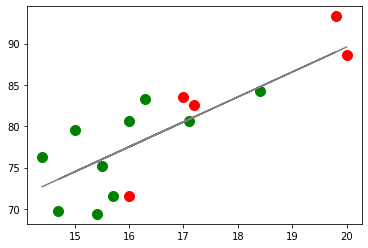

In [13]:
plt.scatter(x_test,y_test,color="Red",s=100)
plt.scatter(x_train,y_train,color="Green",s=100)
plt.plot(x.reshape(-1,1),regression.predict(x.reshape(-1,1)),color="Gray")


In [14]:
###  R2 score 
regression.score(x_test,y_test)

0.7509602004003062

Extrapolate data

In [15]:
##If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
ground_tem=int(input("ground temp:- "))
chrips_rate =(ground_tem-c)/m     ### x=(y-c)/m
print("chrips per second :- ",*chrips_rate)

ground temp:- 95
chrips per second :-  [21.79975097]


Interpolate data

In [16]:
## find the if chirping at a rate of 18 chirps per second , What was the approximate ground temperature that morning?

regression.predict([[18]])


array([[83.54279233]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [17]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [18]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [19]:
## find the any outliers in data 

IQR=df.Brain.quantile(0.75)-df.Brain.quantile(0.25)

upper_fence=df.Brain.quantile(0.75) + (1.5 * IQR) ## Q3
lower_fence=df.Brain.quantile(0.25)-(1.5 * IQR)  ## Q1

print(upper_fence , lower_fence)

119.60625 -70.80375000000001


In [20]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


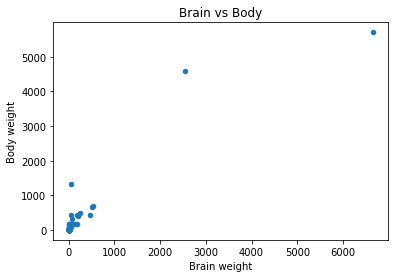

In [21]:
df.plot(x="Brain",y="Body",kind="scatter")
plt.title("Brain vs Body")
plt.xlabel("Brain weight")
plt.ylabel("Body weight")
plt.show()

In [22]:
## split  the data for train and test 

x=df.loc[:,["Brain"]].values
y=df.loc[:,["Body"]].values

from sklearn.model_selection import train_test_split

x_train ,x_test ,y_train ,y_test=train_test_split(x,y,test_size=0.3)

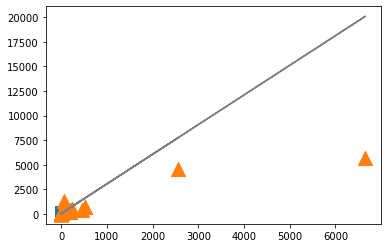

In [23]:
plt.scatter(x_test,y_test,marker="s",s=150)
plt.scatter(x_train,y_train,marker="^",s=200)
plt.plot(x.reshape(-1,1),regression.predict(x.reshape(-1,1)),color="Gray")

In [24]:
##importing Linearregression model 

from sklearn.linear_model import LinearRegression

regression=LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [25]:
print(regression.coef_)

print(regression.intercept_)

[[0.96008369]]
[118.88052848]


In [26]:
y_predict=regression.predict(x_test)

y_predict

array([[119.87901552],
       [120.17664147],
       [118.90261041],
       [172.16517336],
       [118.8853289 ],
       [122.04880466],
       [122.94648292],
       [152.48345768],
       [118.90261041],
       [119.76380548],
       [118.9381335 ],
       [120.51267076],
       [176.48554997],
       [153.76036899],
       [118.97749693],
       [125.40909758],
       [118.99573852],
       [119.07254522],
       [133.11856963]])

In [27]:
## R2 score 

r2_score=regression.score(x_test,y_test)

if r2_score>=0.80:
  print("r2 score:-",r2_score,"This equation is good fit for data")
else:
  print("r2 score:-",r2_score,"This equation is not good fit for data")


r2 score:- -1.9045808919086453 This equation is not good fit for data


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [28]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [29]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [30]:
df.Sex.value_counts()

0    38
1    14
Name: Sex, dtype: int64

In [31]:
df.Rank.value_counts()

3    20
1    18
2    14
Name: Rank, dtype: int64

In [32]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


check weither Sex factor in Salary or not  

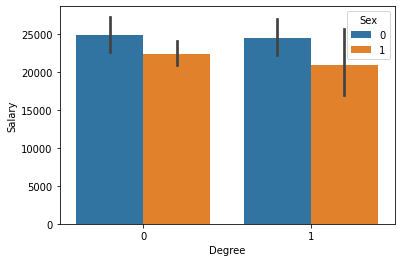

In [33]:
sns.barplot(x=df.Degree,y=df.Salary,hue=df.Sex)

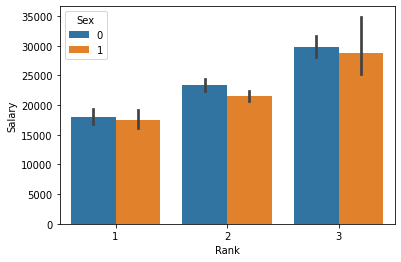

In [34]:
sns.barplot(x=df.Rank,y=df.Salary,hue=df.Sex)

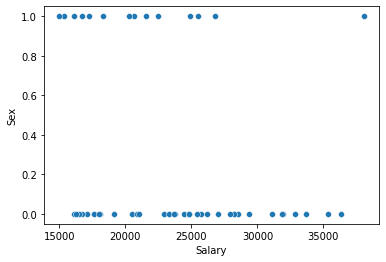

In [35]:
sns.scatterplot(x=df.Salary,y=df.Sex)

 Ans:- In the  data   there is  Sex factor in Salary 


In [36]:
x=df[['Sex','Rank','Year','Degree','YSdeg']].values    ## x_feature
y=df['Salary'].values    ## Y_target 

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
y_predict=regression.predict(x_test)
y_predict

array([29633.72909643, 24384.48867216, 30087.74675134, 21468.57691715,
       30009.99749082, 16138.70795093, 30269.33003877, 29919.20584711,
       15503.04757225, 16296.90744439, 27999.18232787, 25033.07256137,
       28090.09284426, 31812.96629094, 18603.48133246, 21128.55639091])

In [39]:
## finding the values of c and m 
print("value of c",regression.coef_)

print("value of m",regression.intercept_)

value of c [1338.66917077 5521.55591907  454.01765491 -648.58388921  -90.79164372]
value of m 10266.849531182022


selection of columns with the best  R2  score,
with multiple model

In [40]:
regression.score(x_test,y_test)

0.7710018032582404

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(x_train, y_train)
print(list(zip(['Sex','Rank','Year','Degree','YSdeg'],sfs.get_support())))

[('Sex', False), ('Rank', True), ('Year', True), ('Degree', False), ('YSdeg', False)]


In [43]:
from itertools import combinations
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


cols = [x for x in df.columns if x != 'Salary']
Y = df['Salary']
fit_d = {}


for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
      X = df[list(comb)]
      X = sm.add_constant(X)
      model = sm.OLS(Y,X, missing = 'drop').fit()
      fit_d[comb] = model.rsquared

# extract the key for the max R value
key_max = max(fit_d)

print(f'column  {key_max} with a best R2-score of {round(fit_d[key_max],5)}')

column  ('Year', 'YSdeg') with a best R2-score of 0.5782
